# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from tqdm import tqdm

plt.style.use("fivethirtyeight")

# Filter and Drop

In [2]:
df = pd.read_csv("Dropout_Academic_Success.csv")
df = df[df["Age at enrollment"].astype(int) <= 30]
df = df[df["Nacionality"] == 1]
df = df[df["International"] == 0]
df = df.drop(["Nacionality", "International"], axis=1)
drop_columns = ["Application order", "Application mode", "Debtor", "Tuition fees up to date",
                "Curricular units 1st sem (credited)",
                "Curricular units 1st sem (enrolled)", "Curricular units 1st sem (evaluations)",
                "Curricular units 1st sem (approved)", "Curricular units 1st sem (grade)",
                "Curricular units 1st sem (without evaluations)", "Curricular units 2nd sem (credited)",
                "Curricular units 2nd sem (enrolled)", "Curricular units 2nd sem (evaluations)",
                "Curricular units 2nd sem (approved)", "Curricular units 2nd sem (grade)",
                "Curricular units 2nd sem (without evaluations)", "Unemployment rate", "Inflation rate", "GDP"]
df = df.drop(drop_columns, axis=1)
df

,Marital status,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Gender,Scholarship holder,Age at enrollment,Target
0,1,171,1,1,122.0,19,12,5,9,127.3,1,0,1,0,20,Dropout
1,1,9254,1,1,160.0,1,3,3,3,142.5,1,0,1,0,19,Graduate
2,1,9070,1,1,122.0,37,37,9,9,124.8,1,0,1,0,19,Dropout
3,1,9773,1,1,122.0,38,37,5,3,119.6,1,0,0,0,20,Graduate
6,1,9500,1,1,142.0,19,38,7,10,128.4,1,0,0,1,18,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417,1,9070,1,1,132.0,1,1,9,9,133.8,1,0,0,1,20,Graduate
4418,1,9070,1,39,120.0,3,38,3,9,120.0,0,0,1,0,20,Graduate
4419,1,9773,1,1,125.0,1,1,5,4,122.2,0,0,1,0,19,Graduate
4421,1,9500,1,1,154.0,37,37,9,9,149.5,1,0,0,1,30,Dropout


In [3]:
separate_age = 21
df["T"] = (df["Age at enrollment"] >= separate_age).astype(int)

df["Y"] = df["Target"].replace(["Dropout", "Enrolled"], 0)
df["Y"] = df["Y"].replace("Graduate", 1)

df = df.drop(["Age at enrollment", "Target"], axis=1)
df

,Marital status,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Gender,Scholarship holder,T,Y
0,1,171,1,1,122.0,19,12,5,9,127.3,1,0,1,0,0,0
1,1,9254,1,1,160.0,1,3,3,3,142.5,1,0,1,0,0,1
2,1,9070,1,1,122.0,37,37,9,9,124.8,1,0,1,0,0,0
3,1,9773,1,1,122.0,38,37,5,3,119.6,1,0,0,0,0,1
6,1,9500,1,1,142.0,19,38,7,10,128.4,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417,1,9070,1,1,132.0,1,1,9,9,133.8,1,0,0,1,0,1
4418,1,9070,1,39,120.0,3,38,3,9,120.0,0,0,1,0,0,1
4419,1,9773,1,1,125.0,1,1,5,4,122.2,0,0,1,0,0,1
4421,1,9500,1,1,154.0,37,37,9,9,149.5,1,0,0,1,1,0


### Add dummies columns for categorical features

In [4]:
dummies = ["Marital status", "Course", "Previous qualification", "Mother's qualification", "Father's qualification",
           "Mother's occupation", "Father's occupation"]
df = pd.get_dummies(df, columns=dummies)
df

,Daytime/evening attendance,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Gender,Scholarship holder,T,Y,Marital status_1,...,Father's occupation_172,Father's occupation_174,Father's occupation_175,Father's occupation_181,Father's occupation_182,Father's occupation_183,Father's occupation_192,Father's occupation_193,Father's occupation_194,Father's occupation_195
0,1,122.0,127.3,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,160.0,142.5,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,1,122.0,124.8,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,122.0,119.6,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
6,1,142.0,128.4,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4417,1,132.0,133.8,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4418,1,120.0,120.0,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4419,1,125.0,122.2,0,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4421,1,154.0,149.5,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
x_columns = list(df.columns)
x_columns.remove('T')
x_columns.remove('Y')

In [6]:
X = df[x_columns]
T = df['T']
Y = df['Y']
X_and_T = df[x_columns + ['T']]

## Find methods

In [7]:
def print_roc_curve(models, X, Y, names=""):
    colors = ["gold", "deepskyblue", "violet", "lightgreen", "salmon"]
    for model, name, color in zip(models, names, colors):
        kf = KFold()
        y_preds = []
        y_original = []
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]
            m = model.fit(X_train, y_train)
            y_pred = m.predict_proba(X_test)[:, 1]
            y_preds.extend(y_pred)
            y_original.extend(y_test)
        fpr, tpr, _ = metrics.roc_curve(y_original, y_preds)
        score = metrics.roc_auc_score(y_original, y_preds)
        plt.plot(fpr, tpr, label=f"{name}", alpha=0.8, color=color, linewidth=2)
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.title(f"ROC")
    plt.legend()
    plt.show()

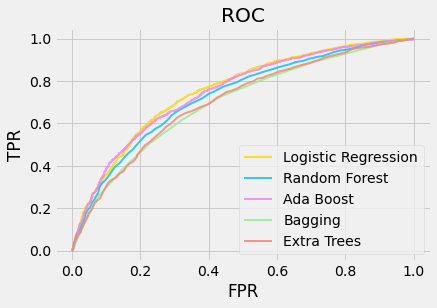

In [8]:
logistic_regression = LogisticRegression(max_iter=10000)
random_forest = RandomForestClassifier()
grad_boost = GradientBoostingClassifier()
ada_boost = AdaBoostClassifier()
bagging = BaggingClassifier()
extra_trees = ExtraTreesClassifier()

print_roc_curve([logistic_regression, random_forest, ada_boost, bagging, extra_trees], X.to_numpy(), Y.to_numpy(),
                ["Logistic Regression", "Random Forest", "Ada Boost", "Bagging", "Extra Trees"])

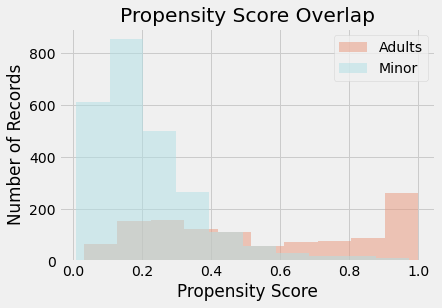

In [9]:
lr = LogisticRegression(max_iter=10000).fit(X, T)
propensity_scores = lr.predict_proba(X)[:, 1]
adults = propensity_scores[T == 1]
minors = propensity_scores[T == 0]
plt.hist(adults, alpha=0.5, color="darksalmon", label="Adults")
plt.hist(minors, alpha=0.5, color="powderblue", label="Minor")
plt.title("Propensity Score Overlap")
plt.xlabel("Propensity Score")
plt.ylabel("Number of Records")
plt.legend()
plt.show()

# Methods

In [10]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X, T)
propensity_scores = lr.predict_proba(X)[:, 1]

## IPW

In [11]:
def calc_ATE_IPW(propensity_scores, T, Y):
    sum1 = sum([t * y / p for p, t, y in zip(propensity_scores, T, Y)]) / len(propensity_scores)
    sum2 = sum([((1 - t) * y) / (1 - p) for p, t, y in zip(propensity_scores, T, Y)]) / len(propensity_scores)
    return sum1 - sum2

In [12]:
print("IPW ATE:", calc_ATE_IPW(propensity_scores, T.to_numpy(), Y.to_numpy()))

IPW ATE: -0.09525338018477486


## S-Learner

In [13]:
def calc_ATE_s_learner(X_and_T, Y):
    model = LogisticRegression(max_iter=10000)
    model.fit(X_and_T, Y)
    treated = X.copy()
    treated['T'] = 1
    y_hat1 = model.predict(treated)
    treated['T'] = 0
    y_hat0 = model.predict(treated)
    return (y_hat1 - y_hat0).mean()

In [14]:
print("S-Learner ATE:", calc_ATE_s_learner(X_and_T, Y.to_numpy()))

S-Learner ATE: -0.182537517053206


## T-Learning

In [15]:
def calc_ATE_t_learner(X, T, Y):
    Y0_lin_model = LogisticRegression(max_iter=10000)
    Y1_lin_model = LogisticRegression(max_iter=10000)

    X_treated = X[T == 1]
    Y_treated = Y[T == 1]

    X_control = X[T == 0]
    Y_control = Y[T == 0]

    Y0_lin_model.fit(X_control, Y_control)
    Y1_lin_model.fit(X_treated, Y_treated)

    y_hat1 = Y1_lin_model.predict(X)
    y_hat0 = Y0_lin_model.predict(X)

    return (y_hat1 - y_hat0).mean()

In [16]:
print("T-Learner ATE:", calc_ATE_t_learner(X, T.to_numpy(), Y.to_numpy()))

T-Learner ATE: -0.20354706684856752


## Matching

In [17]:
def calc_ATE_1_matching(X, T, Y):
    x0 = X[T == 0]
    x1 = X[T == 1]

    y0 = Y[T == 0]
    y1 = Y[T == 1]

    big_sum = 0
    all_distances = []
    for index, row in enumerate(x1):
        distances = np.sqrt(np.sum(np.square(x0 - row), axis=1))
        all_distances.append(distances)
        closest = distances.argmin()
        big_sum += y1[index] - y0[closest]

    all_distances = np.array(all_distances).T

    for index, row in enumerate(x0):
        distances = all_distances[index]
        closest = distances.argmin()
        big_sum += y1[closest] - y0[index]

    return big_sum / len(Y)

In [18]:
print("Matching ATE:", calc_ATE_1_matching(X.to_numpy(), T.to_numpy(), Y.to_numpy()))

Matching ATE: -0.17953615279672577


## Doubly Robust

In [19]:
def calc_ATE_doubly_robust(X, Y, T, propensity_scores):
    Y0_lin_model = LogisticRegression(max_iter=10000)
    Y1_lin_model = LogisticRegression(max_iter=10000)

    X_treated = X[T == 1]
    Y_treated = Y[T == 1]

    X_control = X[T == 0]
    Y_control = Y[T == 0]

    Y0_lin_model.fit(X_control, Y_control)
    Y1_lin_model.fit(X_treated, Y_treated)

    mu1 = Y1_lin_model.predict(X)
    mu0 = Y0_lin_model.predict(X)

    return np.mean(T * (Y - mu1) / propensity_scores + mu1) - np.mean(
        (1 - T) * (Y - mu0) / (1 - propensity_scores) + mu0)

In [20]:
print("Doubly Robust ATE:", calc_ATE_doubly_robust(X.to_numpy(), Y.to_numpy(), T.to_numpy(), propensity_scores))

Doubly Robust ATE: -0.10171974244478832


# Bootstrap

In [21]:
B = 100
n = len(df)
ate_ipw, ate_s_learner, ate_t_learner, ate_matching, ate_doubly_robust = [], [], [], [], []
for b in tqdm(range(B)):
    temp_df = df.sample(n, replace=True).reset_index(inplace=False)
    X_temp = temp_df[x_columns]
    T_temp = temp_df['T']
    Y_temp = temp_df['Y']
    X_and_T_temp = temp_df[x_columns + ['T']]

    lr = LogisticRegression(max_iter=10000)
    lr.fit(X_temp, T_temp)
    propensity_scores_temp = lr.predict_proba(X_temp)[:, 1]

    ate_ipw.append(calc_ATE_IPW(propensity_scores_temp, T_temp.to_numpy(), Y_temp.to_numpy()))
    ate_s_learner.append(calc_ATE_s_learner(X_and_T_temp, Y_temp.to_numpy()))
    ate_t_learner.append(calc_ATE_t_learner(X_temp, T_temp.to_numpy(), Y_temp.to_numpy()))
    ate_matching.append(calc_ATE_1_matching(X_temp.to_numpy(), T_temp.to_numpy(), Y_temp.to_numpy()))
    ate_doubly_robust.append(
        calc_ATE_doubly_robust(X_temp.to_numpy(), Y_temp.to_numpy(), T_temp.to_numpy(), propensity_scores_temp))

 14%|█▍        | 144/1000 [34:15<3:23:36, 14.27s/it]


KeyboardInterrupt: 

In [ ]:
plt.boxplot(ate_ipw)
plt.title("ATE IPW Bootstrap")
plt.ylabel("ATE")
plt.show()

In [ ]:
plt.boxplot(ate_s_learner)
plt.title("ATE S-Learner Bootstrap")
plt.ylabel("ATE")
plt.show()

In [ ]:
plt.boxplot(ate_t_learner)
plt.title("ATE T-Learner Bootstrap")
plt.ylabel("ATE")
plt.show()

In [ ]:
plt.boxplot(ate_matching)
plt.title("ATE Matching Bootstrap")
plt.ylabel("ATE")
plt.show()

In [ ]:
plt.boxplot(ate_doubly_robust)
plt.title("ATE Doubly Robust Bootstrap")
plt.ylabel("ATE")
plt.show()

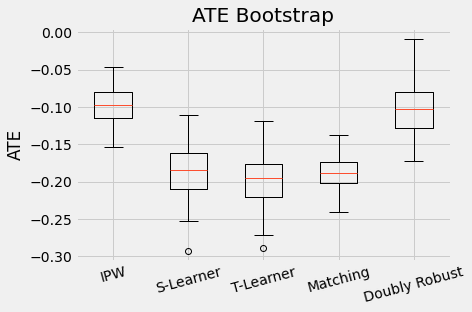

In [23]:
plt.boxplot([ate_ipw, ate_s_learner, ate_t_learner, ate_matching, ate_doubly_robust])
plt.title("ATE Bootstrap")
plt.ylabel("ATE")
plt.xticks([1, 2, 3, 4, 5], ["IPW", "S-Learner", "T-Learner", "Matching", "Doubly Robust"], rotation=15)
plt.show()

In [ ]:
ate_methods = [ate_ipw, ate_s_learner, ate_t_learner, ate_matching, ate_doubly_robust]
for ate in ate_methods:
    lower_ci, upper_ci = np.quantile(ate, [0.025, 0.975])
    print(f"{sum(ate) / len(ate):.4f}\t({lower_ci:.4f},{upper_ci:.4f})")